<h2> Importing the required Packages. <h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [309]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import pickle
import numpy as np
import random 

<h3> Data Reading from given json files.<h3>

In [310]:
data_train=pd.read_json("/content/drive/My Drive/Data/CGAS DATA/train.json")
data_test=pd.read_json("/content/drive/My Drive/Data/CGAS DATA/test.json")
data_train.drop(['cuisine'],axis=1,inplace=True)
data_train.head()
data=pd.concat([data_train,data_test], axis=0)
data=data_train
N=len(data)                                       # total No of Recipes
print(N)
data.head()

39774


,id,ingredients
0,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,"[water, vegetable oil, wheat, salt]"
4,13162,"[black pepper, shallots, cornflour, cayenne pe..."


<h3> All unique ingredients in the given dataset or we can call it nature basket.</h3>
<li> we are getting 6714 unique ingredients from the given dataset.</li>

In [311]:
# All ingredients in the data
All_ingredients=[]
for ig in data['ingredients']:
  All_ingredients+=ig
All_ingredients=set(All_ingredients)
# All_ingredients
print(len(All_ingredients))

6714


<h4>Frequency rank distribution graph</h4>

In [312]:
# frequency rank distribution graph code from Assignment 1 
def plot_frequency_rank_distribution(list_All_ingredients,lab,e,plt):
    dict_ingredient_count={}
    for x in list_All_ingredients:
        if x not in dict_ingredient_count:
            dict_ingredient_count[x]=1
        else: 
            dict_ingredient_count[x]+=1 
    dict_ingredient_count=sorted(dict_ingredient_count.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    ingredient_count_list=[]
    i=1
    rank=[]
    for x in dict_ingredient_count:
        rank.append(i)
        i+=1
        ingredient_count_list.append(x[1])
    ingredient_count_list = np.array(ingredient_count_list)
    ingredient_count_list=ingredient_count_list/ingredient_count_list[0]
    # plt.xlim(1e-1, 1e4)
    # plt.ylim(1e-4, 1e1)
    return (rank,ingredient_count_list)
    plt.loglog(rank,ingredient_count_list,'.-',label=lab)
    
    plt.xlabel('Rank') 
    plt.ylabel('Frequency') 
    plt.legend(loc="upper right",prop={'size': 8})
    # plt.title('All Recipes size distribution plot') 
    plt.title('Frequency-rank distribution for all the recipes at epoch - '+str(e)) 
    # plt.show()

<h4> It generates all the primodial recipes(we can call it as primodial cusine).</h4>

In [313]:
def generate_primodial_cusine(KB,recipe_size,N_primodial):
  recipes={}
  for i in range (N_primodial):
    modified=1
    while(modified):
      recipe=set(random.sample(KB, recipe_size))
      if recipe in recipes.values():
        continue
      modified=0
      recipes[i]=recipe
      # print(recipes[i])
  return recipes

<h4> This method plots recipe size distribution for each epoch.</h4>

In [314]:
def plot_recipe_size_distribution(recipes,e,plt1):
  sizes=[]
  for x in recipes.keys():
    sizes.append(len(recipes[x]))
  max_size=2*max(sizes)
  x_val=[i for i in range(max_size)]
  y_val=[]
  for v in x_val:
    y_val.append(sizes.count(v)/len(sizes))
  return (x_val,y_val)
  plt1.plot(x_val, y_val,'.-' ,label="Recipe size")
  plt1.legend(loc="upper right",prop={'size': 10})
  plt1.xlabel('Recipe Size') 
  plt1.ylabel('Percentage') 
  plt1.title('Recipes size distribution plot after epoch: '+str(e)) 
  # plt.show()   
  




This method checks whether all the generated recipes are valid or not.

In [315]:
def check(recipes):
  for x in recipes.keys():
    for y in recipes.keys():
      if(recipes[x]==recipes[y]):
        continue
      if(recipes[x]==recipes[y]):
        print(x,y)
    # print(len(recipes[x]))
    if(len(recipes[x])==0):
      print(x)

  print("checked")

<h1> Question-1</h1>
<h3>1.</h3>
<li> No of Epochs=5.</li>
<li> In Each epoch I am generating new unique recipes by mutating my previous recipes (using replacement of ingredients from my Kitchen Basket.) .</li>
<li>Number of recipes per epoch: 7954</li>

<h3>2. Proper Initiation of Variables (Randomised Set of recipes)</h3>
<li> I have generated a dictionary which stores set datastructure as value. </li>
<li>variable name: recipes</li>
<li> Each important variable initialization is shown using comments in the code.</li>

<h3>3. Implementation Copy Mutate of algorithm</h3>
<li> Following method is the implementation of copy mutate algorithm</li>

In [316]:
def copy_mutate_model(All_ingredients,N):
  fitness={}                                  #Assigning fitness value for ingredients
  for x in All_ingredients:
    fitness[x]=random.uniform(0,1)

                                 
  N_ing=len(All_ingredients)
  phi=N_ing/N
  print("m ratio: ",phi)
  # return
  N_primodial=500                           # No of Primodial cuisines
  KB_size=int(phi*N_primodial)              # kitchen Basket size
  # ing=list(All_ingredients)
  # # random.shuffle(ing)
  KB=set(random.sample(All_ingredients, KB_size))
  All_ingredients-=KB
  recipe_size=10
  # Primodial cusines generation 
  recipes=generate_primodial_cusine(KB,recipe_size,N_primodial)
  print("primodial cusine generated with ",len(recipes),"recipes. ","\nSize of each recipe: ",len(recipes[0]))
  # return
  id=N_primodial
  No_of_epochs=5

  target_recipes=N                        # No of recipes to generate   
  
  target_recipes_per_epoch=int(target_recipes/No_of_epochs) # No of recipes to generate in 1 epoch
  print("Number of recipes to generate per epoch: ",target_recipes_per_epoch)
  used_ingredients=[]
  print("Wait recipes are generating...",end=" ")
  
  p1_val=[]
  p2_val=[]
  for e in range(No_of_epochs):         # running epochs No_of_epochs
    print("Initial Kitchen Basket at epoch ",e,"is: ",len(KB))
    # return
    for rp in range(target_recipes_per_epoch):                # adding recipes one by one  target_recipes_per_epoch


      # To maintain M ratio
      while(len(KB)/len(recipes)<phi and len(All_ingredients)>0):
        rand_ing=random.sample(All_ingredients,1)
        All_ingredients.remove(rand_ing[0])
        KB.add(rand_ing[0])
        # print(rand_ing[0])


      rand_chosen_recipe_id=random.choice(list(recipes.keys()))
      modified=1
      while(modified):
        random_ingredient_from_recipe=random.choice(list(recipes[rand_chosen_recipe_id]))
        random_ingredient_from_KB=random.choice(list(KB))
        if(random_ingredient_from_recipe==random_ingredient_from_KB or fitness[random_ingredient_from_KB]<fitness[random_ingredient_from_recipe]):
          continue
        mod_recipe=recipes[rand_chosen_recipe_id].copy()
        mod_recipe.add(random_ingredient_from_KB)
        mod_recipe.remove(random_ingredient_from_recipe)
        if(len(mod_recipe)<recipe_size or mod_recipe in recipes.values() ):
          continue
        modified=0
        recipes[id]=mod_recipe
        used_ingredients+=list(mod_recipe)
        id+=1
    # print(len(recipes))
    p1_val.append(plot_frequency_rank_distribution(used_ingredients,'Ingredients',e,plt))
    p2_val.append(plot_recipe_size_distribution(recipes,e,plt1))   
    print("Epoch ",e," completed.","\nCusine size: ",len(recipes))
    # if(e==No_of_epochs-1):
    #   check(recipes)
  plt.figure(figsize=(13, 6))
  plt.xlabel('Rank') 
  plt.ylabel('Frequency') 
  plt.title('Frequency-rank distribution for all the recipes.') 
  i=0
  for p in p1_val:
    i+=1
    plt.loglog(p[0],p[1],'.-',label="epoch: "+str(i))
  plt.legend(loc="upper right",prop={'size': 8})
  plt.show()

  plt.xlabel('Recipe Size') 
  plt.ylabel('Percentage') 
  plt.title('Recipes size distribution plot after each epoch.' )
  i=0
  for p in p2_val:
    i+=1
    plt.loglog(p[0],p[1],'.-',label="epoch: "+str(i))
  plt.legend(loc="upper right",prop={'size': 8})
  plt.show()
      



    

<h3>4. Analyze the output at the end of each Epoch .</h3>
<ol>
<li><b>Graph code:</b></li>

<ul>
<li>I stored x-axis and y-axis values in a list of tupples for each epoch</li>
<li>In the above graph plotting code i run a loop over previously stored list of tuples. and in the end of the loop i ploted all the graphs by using plt.show() </li>

</ul>
 <li>
<b> Graph plot:</b>

 </li>
 <ul>
 <li>All the graphs are plotted in the following cell. for each epoch I plotted overlapping graphs to show the clear comparision</li>
 </ul>
 <li>
 <b>Analysis: </b> From the following graphs I found some insights they are following.
 <ol>
 <li><b>Frequency Rank Distribution.</b></li>
 <ul>
 <li>For the epoch 1 right bottom corner is less then other epochs because in this epoch we had smalles kitchen basket and smallest recipe pool so max value of rank is less for the epoch one.</li>
 <li>Frequency of ingredients of less epoch number is less than the high epoch numbers because tendency of repeating ingredients is more in the bigger cusine than the smaller cusine.</li>
 </ul>
 <li><b>Recipe size Distribution.</b></li>
 <ul>
 <li>
 Recipe size is constant for all the epochs so it is giving a delta graph. In this graph there is only one point that shows that all the recipes has same size.
 </li></ul>
 <ol>
 </li>

</ol>
 <li><b> Maintaining the M ratio</b></li>
 <ul>
 <li>
 I have maintain the M ratio at each recipe inclusion. If my recipe pool length is voilating the M ratio I am including some ingredients from the nature basket into my kitchen basket to maintain the M ratio.
 </li>
 <li> I used variable name phi for M ratio</li>
 </ul>
 <li><b>Algorithm Complexity.</b> </li>
 <ul>
 <li>No of Epochs:e</li>
 <li>No of recepies per epochs: n</li>
 <li> No of Recipes in given dataset: N</li>
 <li> No of Ingredients in nature Basket: I</li>
 <li>Average size of recipe: s=10</li>
 N~e*n because our goal is to generate the pool of previous size.
 <li>complexity for replacement for best Case:</li>
 <p> O(N*(I+N.log(s))~O(N<sup>2</sup>) if I is less than N and s is constant 10</p>

 <i>*Assuming my random function is giving unique ingredient all the time. Otherwise in worst case it can be exponential if random function is choosing same ingredient again and again.</i>
 <p></p>
 <i>* So we can consider Average case here that random function have to select values from the cusine N times<i>
 <p>O(N*(I+(N)*(N.log(s)))~O(N<sup>3</sup>) if I is less than N and s is constant 10</p>
 </ul>
 

 </ol>

m ratio:  0.16880374113742647
primodial cusine generated with  500 recipes.  
Size of each recipe:  10
Number of recipes to generate per epoch:  7954
Wait recipes are generating... Initial Kitchen Basket at epoch  0 is:  84
Epoch  0  completed. 
Cusine size:  8454
Initial Kitchen Basket at epoch  1 is:  1427
Epoch  1  completed. 
Cusine size:  16408
Initial Kitchen Basket at epoch  2 is:  2770
Epoch  2  completed. 
Cusine size:  24362
Initial Kitchen Basket at epoch  3 is:  4113
Epoch  3  completed. 
Cusine size:  32316
Initial Kitchen Basket at epoch  4 is:  5455
Epoch  4  completed. 
Cusine size:  40270


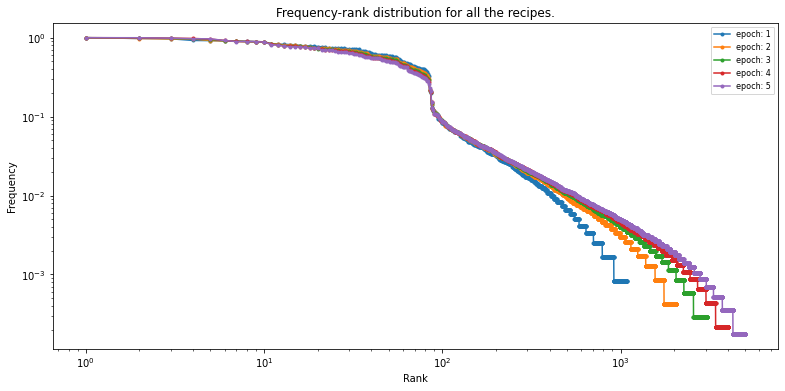

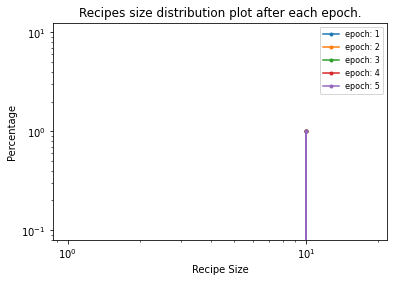

In [317]:
All_ingredients_c=All_ingredients.copy()
recipes=copy_mutate_model(All_ingredients_c,N)

<h1> Question-2 </h1>



<ol>
<li><b> Incorporation of addition, deletion and replacement of ingredients with varying
probability</b></li>

<ul>
<li>I used addition and deletion in my program </li>
<li>I gave different rations (probablities) to the addition: delition and plotted all the different observations from all the probablities. </li>
<li>Taking input from the user is very crucial task because it is hard for a user to give that much ingredients to generate all the cusines so I automate the process and selected the ingredients from my kitchen basket. </li>
<li> Instead of taking ingredient from the user my program can take delition probablity.</li>

</ul>
 <li>
<b> Cuisine analysis per epoch​:</b>

 </li>
 <ul>
 <li>All the graphs are plotted in the following cell. for each epoch I plotted overlapping graphs to show the clear comparision</li>
 <li> I also plotted these graphs for different ratios of addition:deletion.</li>
 </ul>
 <li>
 <b>Analysis: </b> From the following graphs I found some insights they are following.
 <ol>
 <li><b>Frequency Rank Distribution.</b></li>
 <ul>
 <li> There is a sharp dropping point in the graph which shows that some ingredients has comparatively much lesser frequency than some other group of ingredients.</li>
 <li>For the epoch 1 right bottom corner is less then other epochs because in this epoch we had smalles kitchen basket so max value of rank is less for the epoch one.</li>
 <li>Frequency of less epoch number is less than the high epoch numbers because tendency of repeating ingredients is more in the bigger cusine than the smaller cusine.</li>
 </ul>
 <li><b>Recipe size Distribution.</b></li>
 <ul>
 <li> For different addition:deletion ration these graphs are shifting towards left and right.</li>
 <li> If probablity of addition is more than the deletion then graph shifted to right because there will be more recipes with more size than mean </li>
 <li>
 we can see that for e=1 graph is smaller than other e values because we have less variance in this epoch compare to other epochs.(5:5)
 </li></ul>
 <ol>
 

</ol>
 <li><b> Maintaining the M ratio</b></li>
 <ul>
 <li>
 I have maintain the M ratio at each recipe inclusion. If my recipe pool length is voilating the M ratio I am including some ingredients from the nature basket into my kitchen basket to maintain the M ratio.
 </li>
 </ul>
 <li><b>Algorithm Complexity.</b> </li>
 <ul>
 <li>No of Epochs:e</li>
 <li>No of recepies per epochs: n</li>
 <li> No of Recipes in given dataset: N</li>
 <li> No of Ingredients in nature Basket: I</li>
 <li> Average size of recipe: s</li>
 N~e*n because our goal is to generate the pool of previous size.

 <li>complexity for Deletion for best case:</li>
 <p> O(N*(I+N))~O(N<sup>2</sup>) if I is less than N</p>
 <li>complexity for Addition for best case:</li>
 <p> O(N*(I+N))~O(N<sup>2</sup>) if I is less than N</p>
 <p>*Taking best case where we have not any conflict with random choosen ingredient </p>
 <i>*Assuming my random function is giving unique ingredient all the time. Otherwise in worst case it can be exponential if random function is choosing same ingredient or unsuccessful attemp for appropriate ingredient again and again.</i>
 <p>One more worst case can be there where recipe size in addition is equal to I. Because Ingredients are adding into the same recipe again and again. </p>
 <i>* So we can consider Average case here that random function have to select values from the cusine N times</i>
  <li>complexity for Deletion for Average case:</li>
<p>O(N*(I+(N)*(N)))~O(N<sup>3</sup>) if I is less than N</p>
 <li>complexity for Addition for Average case:</li>

 <p>O(N*(I+(N)*(N.log(s)))~O(N<sup>3</sup>log(s)) if I is less than N</p>
 <li> There may be one case in which all the ingredient added/deleted to one of the recipe. It will consider as the worst case but we still have worst case worst than this as exponential</li>
 <li> For replacement I have mentioned complexity in above cell.</li>
 </ul>
 

 </ol>

In [318]:
def copy_mutate_model2(All_ingredients,N,deletion):
  addition=(1-deletion)*100
  deletion=deletion*100
  fitness={}                                #Assigning fitness value for ingredients
  for x in All_ingredients:
    fitness[x]=random.uniform(0,1)                          
  N_ing=len(All_ingredients)
  phi=N_ing/N
  print("m ratio: ",phi)
  N_primodial=500                        # No of Primodial cuisines
  KB_size=int(phi*N_primodial)           # kitchen Basket size
  KB=set(random.sample(All_ingredients, KB_size))
  All_ingredients-=KB
  recipe_size=10
  
  # Primodial cusines generation 
  recipes=generate_primodial_cusine(KB,recipe_size,N_primodial)
  print("primodial cusine generated. ",len(recipes),"\nSize of each in primodial cusine recipe: ",len(recipes[0]))
  id=N_primodial
  No_of_epochs=5

  target_recipes=N                    # No of recipes to generate  
  
  target_recipes_per_epoch=int(target_recipes/No_of_epochs) # No of recipes to generate in 1 epoch
  print("Number of recipes to generate per epoch: ",target_recipes_per_epoch)
  used_ingredients=[]
  print("Wait recipes are generating...",end=" ")
  p1_val=[]
  p2_val=[]
  for e in range(No_of_epochs):         # running epochs No_of_epochs
    print("\nInitial Kitchen Basket Size for epoch ",e,"is: ",len(KB))
    for rp in range(target_recipes_per_epoch):                # adding recipes one by one  target_recipes_per_epoch
      
      while(len(KB)/len(recipes)<phi and len(All_ingredients)>0):
        rand_ing=random.sample(All_ingredients,1)
        All_ingredients.remove(rand_ing[0])
        KB.add(rand_ing[0])
      rand_chosen_recipe_id=random.choice(list(recipes.keys()))
      modified=1
      while(modified):
        random_ingredient_from_recipe=random.choice(list(recipes[rand_chosen_recipe_id]))
        random_ingredient_from_KB=random.choice(list(KB))
        mod_recipe=recipes[rand_chosen_recipe_id].copy()
        if(rp<int (.01*addition*target_recipes_per_epoch)):
          mod_recipe.add(random_ingredient_from_KB)
          if(mod_recipe in recipes.values() ):
            continue
        else:
          mod_recipe.remove(random_ingredient_from_recipe)
          if(mod_recipe in recipes.values() or len(mod_recipe)==0):
            continue
        if(len(mod_recipe)==0):
          continue
        recipes[id]=mod_recipe
        modified=0
        used_ingredients+=list(mod_recipe)
        id+=1
    p1_val.append(plot_frequency_rank_distribution(used_ingredients,'Ingredients',e,plt))
    p2_val.append(plot_recipe_size_distribution(recipes,e,plt1))   
    print("Epoch ",e," completed.","\nCusine size: ",len(recipes))
    # if(e==No_of_epochs-1):
    #   check(recipes)
  plt.figure(figsize=(13, 6))
  plt.xlabel('Rank') 
  plt.ylabel('Frequency') 
  plt.title('Frequency-rank distribution for all the recipes at ratio: '+str(int(addition/10))+':'+str(int(deletion/10))) 
  i=0
  for p in p1_val:
    i+=1
    plt.loglog(p[0],p[1],'.-',label="epoch: "+str(i))
  plt.legend(loc="upper right",prop={'size': 8})
  plt.show()

  plt.xlabel('Recipe Size') 
  plt.ylabel('Percentage') 
  plt.title('Recipes size distribution plot after each epoch at the ratio: '+str(int(addition/10))+":"+str(int(deletion/10)) )
  i=0
  for p in p2_val:
    i+=1
    plt.loglog(p[0],p[1],'.-',label="epoch: "+str(i))
  plt.legend(loc="upper right",prop={'size': 8})
  plt.show()


    

give inputs for:
m ratio:  0.16880374113742647
primodial cusine generated.  500 
Size of each in primodial cusine recipe:  10
Number of recipes to generate per epoch:  7954
Wait recipes are generating... 
Initial Kitchen Basket Size for epoch  0 is:  84
Epoch  0  completed. 
Cusine size:  8454

Initial Kitchen Basket Size for epoch  1 is:  1427
Epoch  1  completed. 
Cusine size:  16408

Initial Kitchen Basket Size for epoch  2 is:  2770
Epoch  2  completed. 
Cusine size:  24362

Initial Kitchen Basket Size for epoch  3 is:  4113
Epoch  3  completed. 
Cusine size:  32316

Initial Kitchen Basket Size for epoch  4 is:  5455
Epoch  4  completed. 
Cusine size:  40270


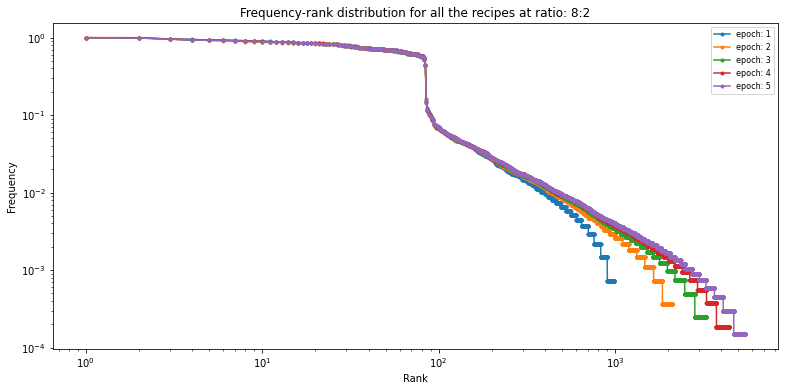

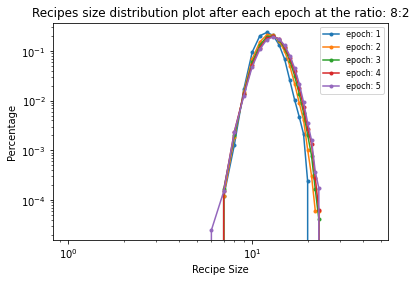

m ratio:  0.16880374113742647
primodial cusine generated.  500 
Size of each in primodial cusine recipe:  10
Number of recipes to generate per epoch:  7954
Wait recipes are generating... 
Initial Kitchen Basket Size for epoch  0 is:  84
Epoch  0  completed. 
Cusine size:  8454

Initial Kitchen Basket Size for epoch  1 is:  1427
Epoch  1  completed. 
Cusine size:  16408

Initial Kitchen Basket Size for epoch  2 is:  2770
Epoch  2  completed. 
Cusine size:  24362

Initial Kitchen Basket Size for epoch  3 is:  4113
Epoch  3  completed. 
Cusine size:  32316

Initial Kitchen Basket Size for epoch  4 is:  5455
Epoch  4  completed. 
Cusine size:  40270


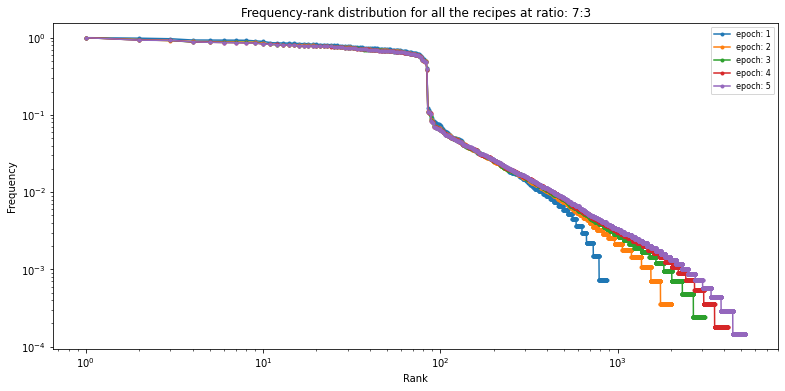

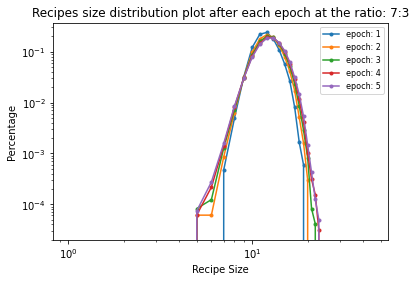

m ratio:  0.16880374113742647
primodial cusine generated.  500 
Size of each in primodial cusine recipe:  10
Number of recipes to generate per epoch:  7954
Wait recipes are generating... 
Initial Kitchen Basket Size for epoch  0 is:  84
Epoch  0  completed. 
Cusine size:  8454

Initial Kitchen Basket Size for epoch  1 is:  1427
Epoch  1  completed. 
Cusine size:  16408

Initial Kitchen Basket Size for epoch  2 is:  2770
Epoch  2  completed. 
Cusine size:  24362

Initial Kitchen Basket Size for epoch  3 is:  4113
Epoch  3  completed. 
Cusine size:  32316

Initial Kitchen Basket Size for epoch  4 is:  5455
Epoch  4  completed. 
Cusine size:  40270


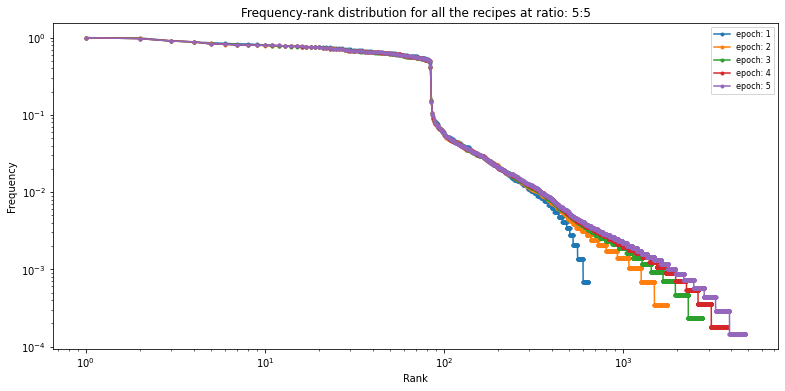

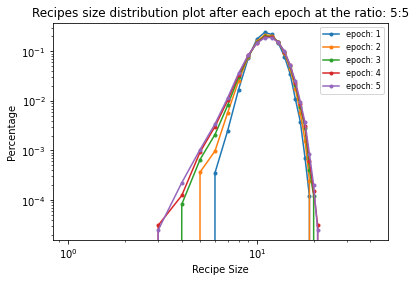

m ratio:  0.16880374113742647
primodial cusine generated.  500 
Size of each in primodial cusine recipe:  10
Number of recipes to generate per epoch:  7954
Wait recipes are generating... 
Initial Kitchen Basket Size for epoch  0 is:  84
Epoch  0  completed. 
Cusine size:  8454

Initial Kitchen Basket Size for epoch  1 is:  1427
Epoch  1  completed. 
Cusine size:  16408

Initial Kitchen Basket Size for epoch  2 is:  2770
Epoch  2  completed. 
Cusine size:  24362

Initial Kitchen Basket Size for epoch  3 is:  4113
Epoch  3  completed. 
Cusine size:  32316

Initial Kitchen Basket Size for epoch  4 is:  5455
Epoch  4  completed. 
Cusine size:  40270


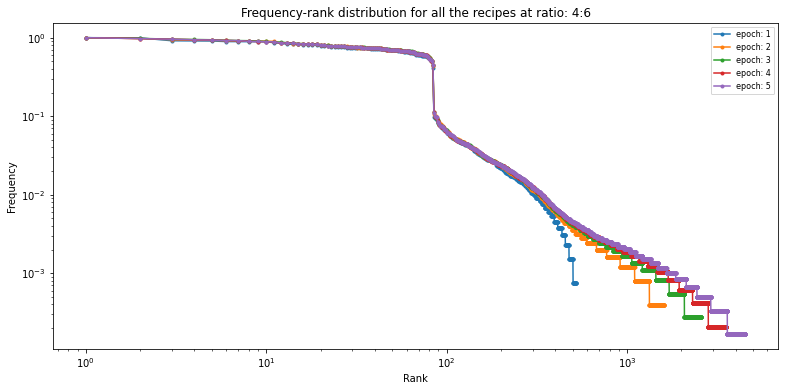

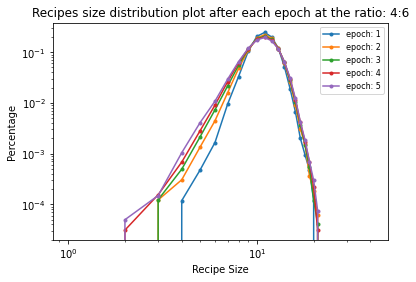

In [319]:
All_ingredients_c=All_ingredients.copy()
print("give inputs for:")
# deletion=float (input("Enter Deletion percentage: "))
ratios=[.2,.3,.5,.6]
for r in ratios:
  All_ingredients_c=All_ingredients.copy()
  recipes=copy_mutate_model2(All_ingredients_c,N,r)